In [47]:
from draw3d import *
from math import *
from functools import reduce
from itertools import accumulate

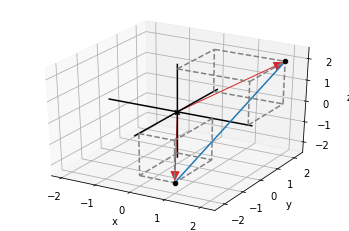

In [2]:
draw3d(Points3D((2, 2, 2), (1, -2, -2)),
       Arrow3D((2, 2, 2)), Arrow3D((1, -2, -2)),
       Segment3D((2, 2, 2), (1, -2, -2)),
       Box3D(2, 2, 2), Box3D(1, -2, -2)
       )

In [3]:
vals = [-1, 1]
points = [(x, y, z) for x in vals for y in vals for z in vals]

In [4]:
def length(point):
    return sqrt(sum([coord**2 for coord in point]))

In [5]:
def get_distance(point1, point2):
    return sqrt(sum([(coord1 - coord2)**2 for coord1, coord2 in zip(point1, point2)]))

In [6]:
def order_points(point1, point2):
    rank1 = int(point1[0] < 0)*2**2 + int(point1[1] < 0)*2**1 + int(point1[2] < 0)*2**0
    rank2 = int(point2[0] < 0)*2**2 + int(point2[1] < 0)*2**1 + int(point2[2] < 0)*2**0
    return (point1, point2) if rank1 > rank2 else (point2, point1)

In [7]:
def get_edges(points):
    return {order_points(point1, point2) for point1 in points for point2 in points if get_distance(point1, point2) == 2}    

In [8]:
edges = get_edges(points)

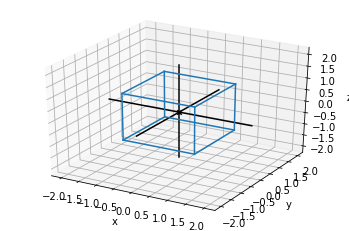

In [9]:
draw3d(*[Segment3D(*edge) for edge in edges])

In [10]:
def add(*vectors):
    return tuple(sum(v) for v in zip(*vectors))

In [11]:
def scale(ratio, *vectors):
    return [tuple(v_i * ratio for v_i in vector) for vector in vectors]    

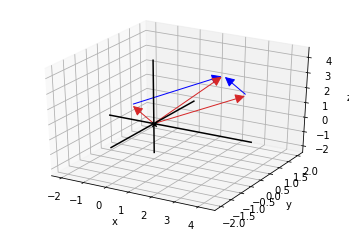

In [24]:
p1, p2 = (4, 0, 3), (-1, 0, 1)
p3 = add(p1, p2)
draw3d(Arrow3D(p1), Arrow3D(p2), Arrow3D(p3, p1, color='blue'), Arrow3D(p3, p2, color='blue'), Arrow3D(p3))

In [25]:
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]

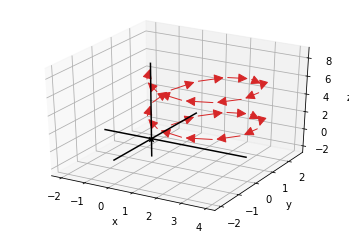

In [75]:
vs_acc = list(zip(*map(accumulate, zip(*vs))))
draw3d(*[Arrow3D(*arrow) for arrow in [(vs_acc[i + 1], vs_acc[i]) for i in list(range(len(vs_acc) - 1))]])

In [87]:
isfinite(1.7320508075688772)

True

In [91]:
rng = list(range(1, 11))
[(length((x, y, z)), (x, y, z)) for x in rng for y in rng for z in rng if (length((x, y, z))).is_integer()]

[(3.0, (1, 2, 2)),
 (9.0, (1, 4, 8)),
 (9.0, (1, 8, 4)),
 (3.0, (2, 1, 2)),
 (3.0, (2, 2, 1)),
 (7.0, (2, 3, 6)),
 (6.0, (2, 4, 4)),
 (7.0, (2, 6, 3)),
 (11.0, (2, 6, 9)),
 (11.0, (2, 9, 6)),
 (7.0, (3, 2, 6)),
 (7.0, (3, 6, 2)),
 (9.0, (3, 6, 6)),
 (9.0, (4, 1, 8)),
 (6.0, (4, 2, 4)),
 (6.0, (4, 4, 2)),
 (9.0, (4, 4, 7)),
 (9.0, (4, 7, 4)),
 (9.0, (4, 8, 1)),
 (12.0, (4, 8, 8)),
 (15.0, (5, 10, 10)),
 (7.0, (6, 2, 3)),
 (11.0, (6, 2, 9)),
 (7.0, (6, 3, 2)),
 (9.0, (6, 3, 6)),
 (9.0, (6, 6, 3)),
 (11.0, (6, 6, 7)),
 (11.0, (6, 7, 6)),
 (11.0, (6, 9, 2)),
 (9.0, (7, 4, 4)),
 (11.0, (7, 6, 6)),
 (9.0, (8, 1, 4)),
 (9.0, (8, 4, 1)),
 (12.0, (8, 4, 8)),
 (12.0, (8, 8, 4)),
 (11.0, (9, 2, 6)),
 (11.0, (9, 6, 2)),
 (15.0, (10, 5, 10)),
 (15.0, (10, 10, 5))]

In [92]:
a = (1, 2, -1)
b = (3, 0, 3)

In [107]:
def dot(u, v):
    return sum([(u_i * v_i) for u_i, v_i in zip(u, v)])

In [110]:
dot((3, 4), (4, 3))

24

In [113]:
print(length((3, 4)))
print(length((4, 3)))

5.0
5.0


In [115]:
def angle_between(u, v):
    return acos(dot(u, v)/(length(v) * length(v)))

In [118]:
angle_between((1, 2, 2), (2, 2, 1)) * 180 / pi

27.266044450732828

In [119]:
dot((-1, -1, 1), (1, 2, 1))

-2

In [120]:
3.61 * 1.44 * cos(101.3 * pi / 180)

-1.0186064362303022